In [1]:
%load_ext autoreload
%autoreload 2

# adding parent directory to import path
# otherwise simply place the 'network' folder in the same directory
import sys
import os
parent = os.path.dirname(os.path.abspath(''))
sys.path.append(parent)


import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
### MNIST classification

# load
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

# preprocess
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode
# np.eye() creates an identity matrix
# we then create the one hot matrix by referencing every element
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [6]:
# define network
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200, bias=None),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'method': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [7]:
for _ in range(5):
    nn.train(X, y, param, rand=True, loss_func='fast_cross_entropy')
    yhat = nn(X_t)
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 3.516939.
Epoch 0, Performance = 95.58
Average loss = 1.453981.
Epoch 1, Performance = 97.11999999999999
Average loss = 0.960748.
Epoch 2, Performance = 97.67
Average loss = 0.642387.
Epoch 3, Performance = 97.88
Average loss = 0.457216.
Epoch 4, Performance = 97.89


0

In [9]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [79]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'method': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [80]:
temp = nn2.layers[0].w1

In [81]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 6921.042638.
Average loss = 5157.333959.
Average loss = 3540.383435.
Average loss = 2219.339241.
Average loss = 1238.026940.
Average loss = 556.191819.
Average loss = 223.697601.
Average loss = 145.323870.
Average loss = 174.814926.
Average loss = 168.245088.
Average loss = 149.027743.
Average loss = 140.885692.
Average loss = 142.406888.
Average loss = 138.017277.
Average loss = 135.934844.
Average loss = 136.640753.
Average loss = 135.553293.
Average loss = 134.362184.
Average loss = 134.839725.
Average loss = 133.987322.
Average loss = 134.350401.
Average loss = 135.228837.
Average loss = 132.491092.
Average loss = 132.684374.
Average loss = 133.127790.
Average loss = 133.016102.
Average loss = 131.529455.
Average loss = 131.923126.
Average loss = 132.270642.
Average loss = 131.327322.
Average loss = 131.600955.
Average loss = 130.195267.
Average loss = 130.177429.
Average loss = 131.671714.
Average loss = 129.758109.
Average loss = 129.498378.
Average loss = 128.6634

In [67]:
print(f"{param['epoch']} epoch trained.")
# errors
nn2.query(x3, mode='not classification') - x4

1000 epoch trained.


array([[-4.29315672e-01],
       [-4.90129978e-01],
       [-3.35574325e-01],
       [-2.01220692e-01],
       [-8.70690787e-02],
       [ 6.88051403e-03],
       [ 8.06280865e-02],
       [ 1.34173639e-01],
       [ 1.67517171e-01],
       [ 1.80658683e-01],
       [ 1.73598175e-01],
       [ 1.46335646e-01],
       [ 9.88710973e-02],
       [ 3.12045284e-02],
       [ 3.44953058e-02],
       [ 1.46796817e-01],
       [ 2.38896308e-01],
       [ 3.10793778e-01],
       [ 3.62489229e-01],
       [ 3.93982659e-01],
       [ 4.05274069e-01],
       [ 3.96363459e-01],
       [ 3.67250828e-01],
       [ 3.17936178e-01],
       [ 2.48419507e-01],
       [ 1.58700816e-01],
       [ 4.87801046e-02],
       [-8.13426268e-02],
       [-2.31667378e-01],
       [-4.02194150e-01],
       [-5.92922942e-01],
       [-6.01518436e-01],
       [-4.23693672e-01],
       [-2.66070928e-01],
       [-1.28650205e-01],
       [-1.14315013e-02],
       [ 8.55851818e-02],
       [ 1.62399845e-01],
       [ 2.1

In [83]:
# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[ 0.        ,  0.        ,  0.04710312,  0.03774018,  0.04140066,
         0.        , -0.53122748,  0.06858084,  0.        ,  0.        ,
         0.0681565 ,  0.13370865, -0.0174884 , -0.39372207,  0.05299567,
        -0.04049305,  0.0522301 , -0.04572272, -0.83045019,  0.13460619],
       [ 0.        ,  0.        ,  0.04158678,  0.09660662, -0.00951299,
         0.        , -0.52522315,  0.13690916,  0.        ,  0.        ,
         0.13349915,  0.13371019, -0.01748992, -0.46630787,  0.11506599,
        -0.10014332,  0.11456981, -0.11006997, -0.80691577,  0.13461083],
       [ 0.        ,  0.        , -0.24547174,  3.02636614, -2.8004723 ,
         0.        , -0.57931997,  3.50841255,  0.        ,  0.        ,
         3.35572669,  0.13370865, -0.0174884 , -0.94044373,  3.19435032,
        -3.07458888,  3.20967563, -3.35581446, -1.04650146,  0.13460619]])

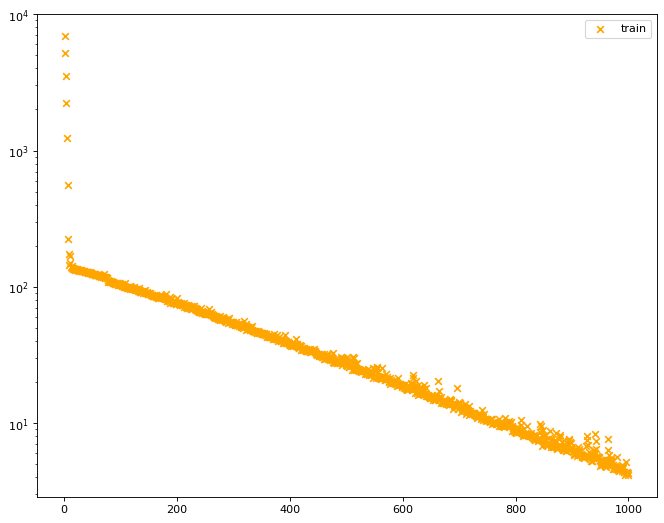

In [84]:
nn2.plot_loss()